# Worksheet

## Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

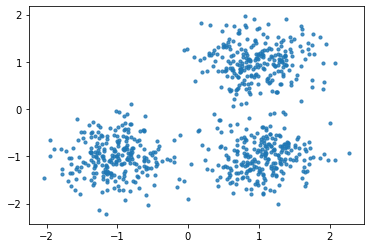

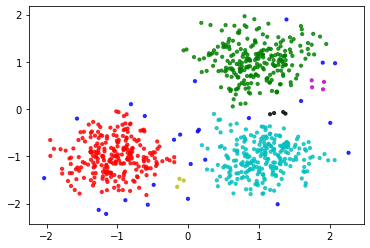

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

# Generate synthetic dataset
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.show()

# DBSCAN Class
class DBC:
    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignements = [-1 for _ in range(len(self.dataset))]  # Fix dataset reference

    def is_unassigned(self, i):
        return self.assignements[i] == -1

    def dist(self, i, j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])

    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts  # Fix function reference

    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):  # Fix iteration
            if self.dist(i, j) <= self.epsilon:
                neighborhood.append(j)
        return neighborhood

    def generate_cluster(self, i, cluster_num):
        potential_cluster = self.get_neighborhood(i)
        while potential_cluster:
            pt = potential_cluster.pop()
            if self.is_unassigned(pt):  # Only assign if unassigned
                self.assignements[pt] = cluster_num
                if self.is_core(pt):
                    new_neighborhood = self.get_neighborhood(pt)
                    potential_cluster += [p for p in new_neighborhood if self.is_unassigned(p)]  # Fix function calls

    def dbscan(self):
        cluster_num = 0  # Fix missing initialization
        for i in range(len(self.dataset)):
            if self.is_unassigned(i) and self.is_core(i):
                self.generate_cluster(i, cluster_num)
                cluster_num += 1
        return self.assignements

# Run DBSCAN
clustering = DBC(X, 3, 0.2).dbscan()

# Fix color assignment issue
clustering = np.array(clustering)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
unique_clusters = np.unique(clustering)
colors_dict = {c: colors[i % len(colors)] for i, c in enumerate(unique_clusters)}

plt.scatter(X[:, 0], X[:, 1], color=[colors_dict[c] for c in clustering], s=10, alpha=0.8)
plt.show()


## Soft Clustering

We generate 10 data points that come from a normal distribution with mean 5 and variance 1.

In [ ]:
import random
import numpy as np
from sklearn.cluster import KMeans

mean = 5
stdev = 1

s1 = np.random.normal(mean, stdev, 10).tolist()
print(s1)

a) Generate 10 more data points, this time coming from a normal distribution with mean 8 and variance 1.

In [ ]:
s2 = np.random.normal( ... , ... , ... ).tolist()
print(s2)

b) Flip a fair coin 10 times. If the coin lands on H, then pick the last data point of `s1` and remove it from `s1`, if T then pick the last data point from `s2` and remove it from `s2`. Add these 10 points to a list called `data`.

In [ ]:
data = []
for i in range(10):
    # flip coin
    coin_output = random.choice([0, 1])
    if coin_output == 0:
        p1 = ...
        data.append(p1)
    else:
        p2 = ...
        data.append(p2)
print(data)

c) This `data` is a Gaussian Mixture Distribution with 2 mixture components. Over the next few questions we will walk through the GMM algorithm to see if we can uncover the parameters we used to generate this data. First, please list all these parameters of the GMM that created `data` and the values we know they have.